Soil Fertility Analysis

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Humus -rich fertile soil - nitrogen and phosphorus

pH - In alkaline lands with a pH greater than 7.5-8, most micronutrients are less available, while acidity contributes to heavy metal accumulation in the fields and reduces phosphorus absorbability.

Soil Temperatures - ranging from 18 to 24°C (65 to 75°F) are ideal for most plants.

How To Measure Soil Fertility?

For evaluating the overall quality of the land and its productivity, in particular, it is necessary to conduct soil testing. As a result, the farmer will receive data on the composition, type, mineral content (e.g., nitrogen, potassium, phosphorus), pH level, and other soil fertility indicators. Testing laboratories can also provide an interpretation of these values and general recommendations for adding nutrients to the soil.

We have data of nitrogen, potassium, phosphorus, ph level

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("/content/drive/MyDrive/Machine learning /1. Supervised /Project - Soil Fertility Analysis (Decision Tree, SVM and Random Forest)/Website of Soil Fertility Analysis/model/dataset.csv")

In [13]:
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [14]:
data.shape

(880, 13)

In [15]:
data.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


<Axes: >

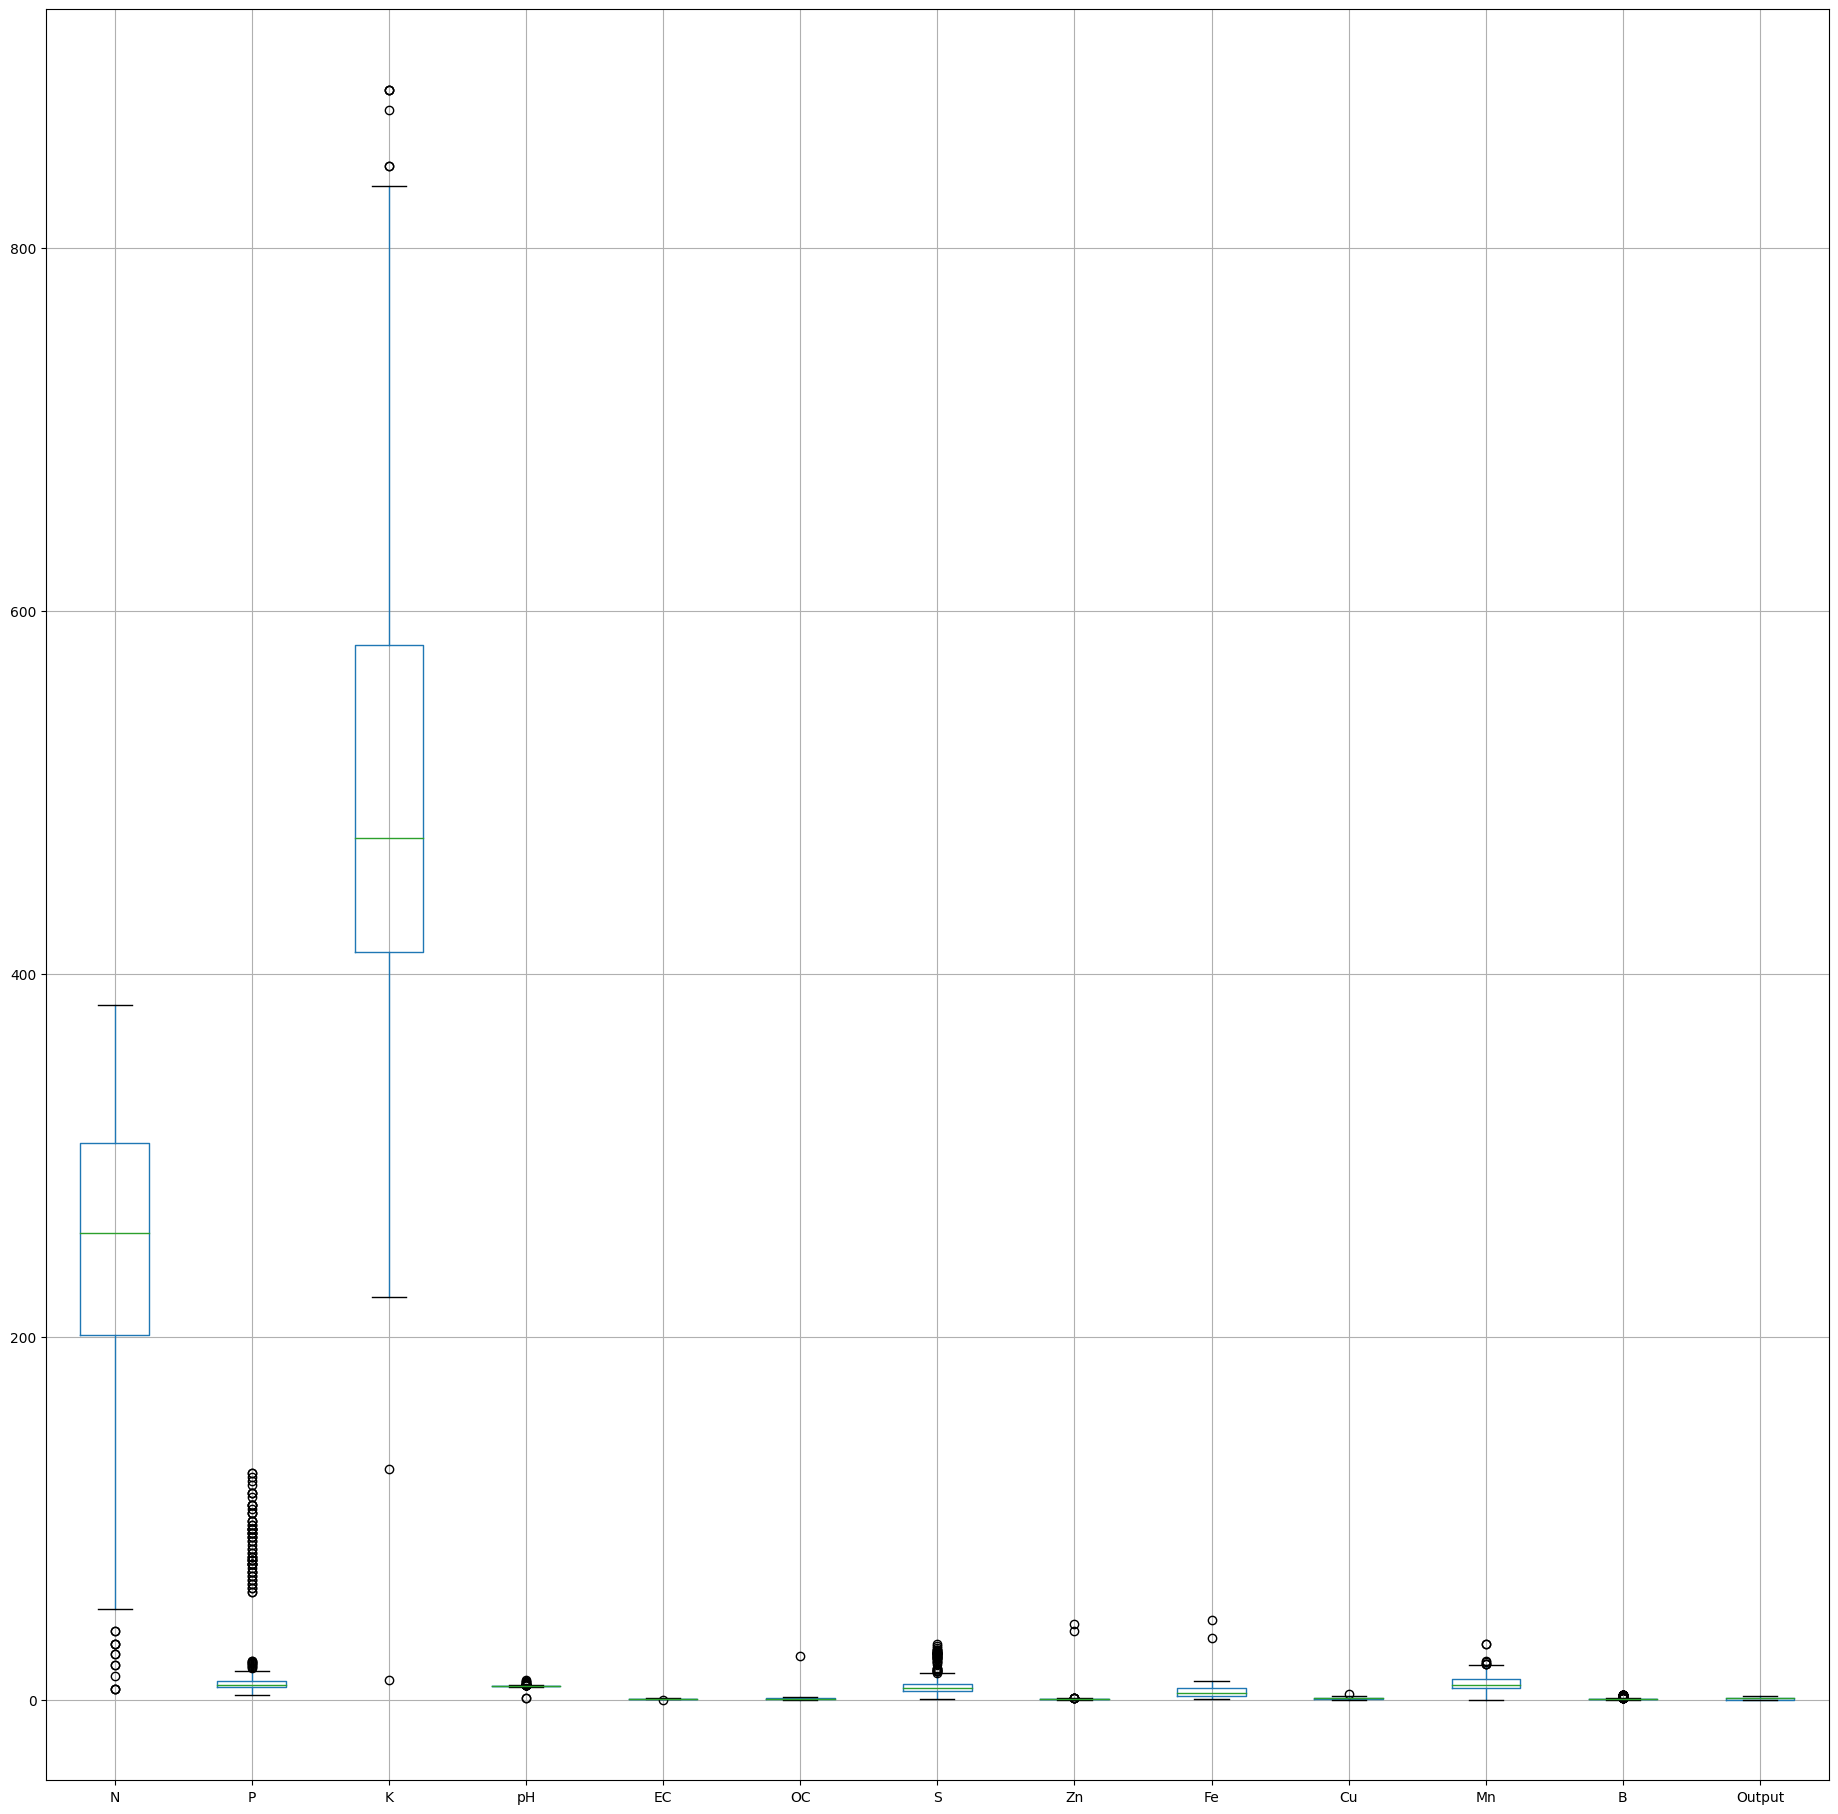

In [16]:
data.boxplot(figsize=(23,23))

as we can see there are outliers in the data, we need to remove them first

<Axes: >

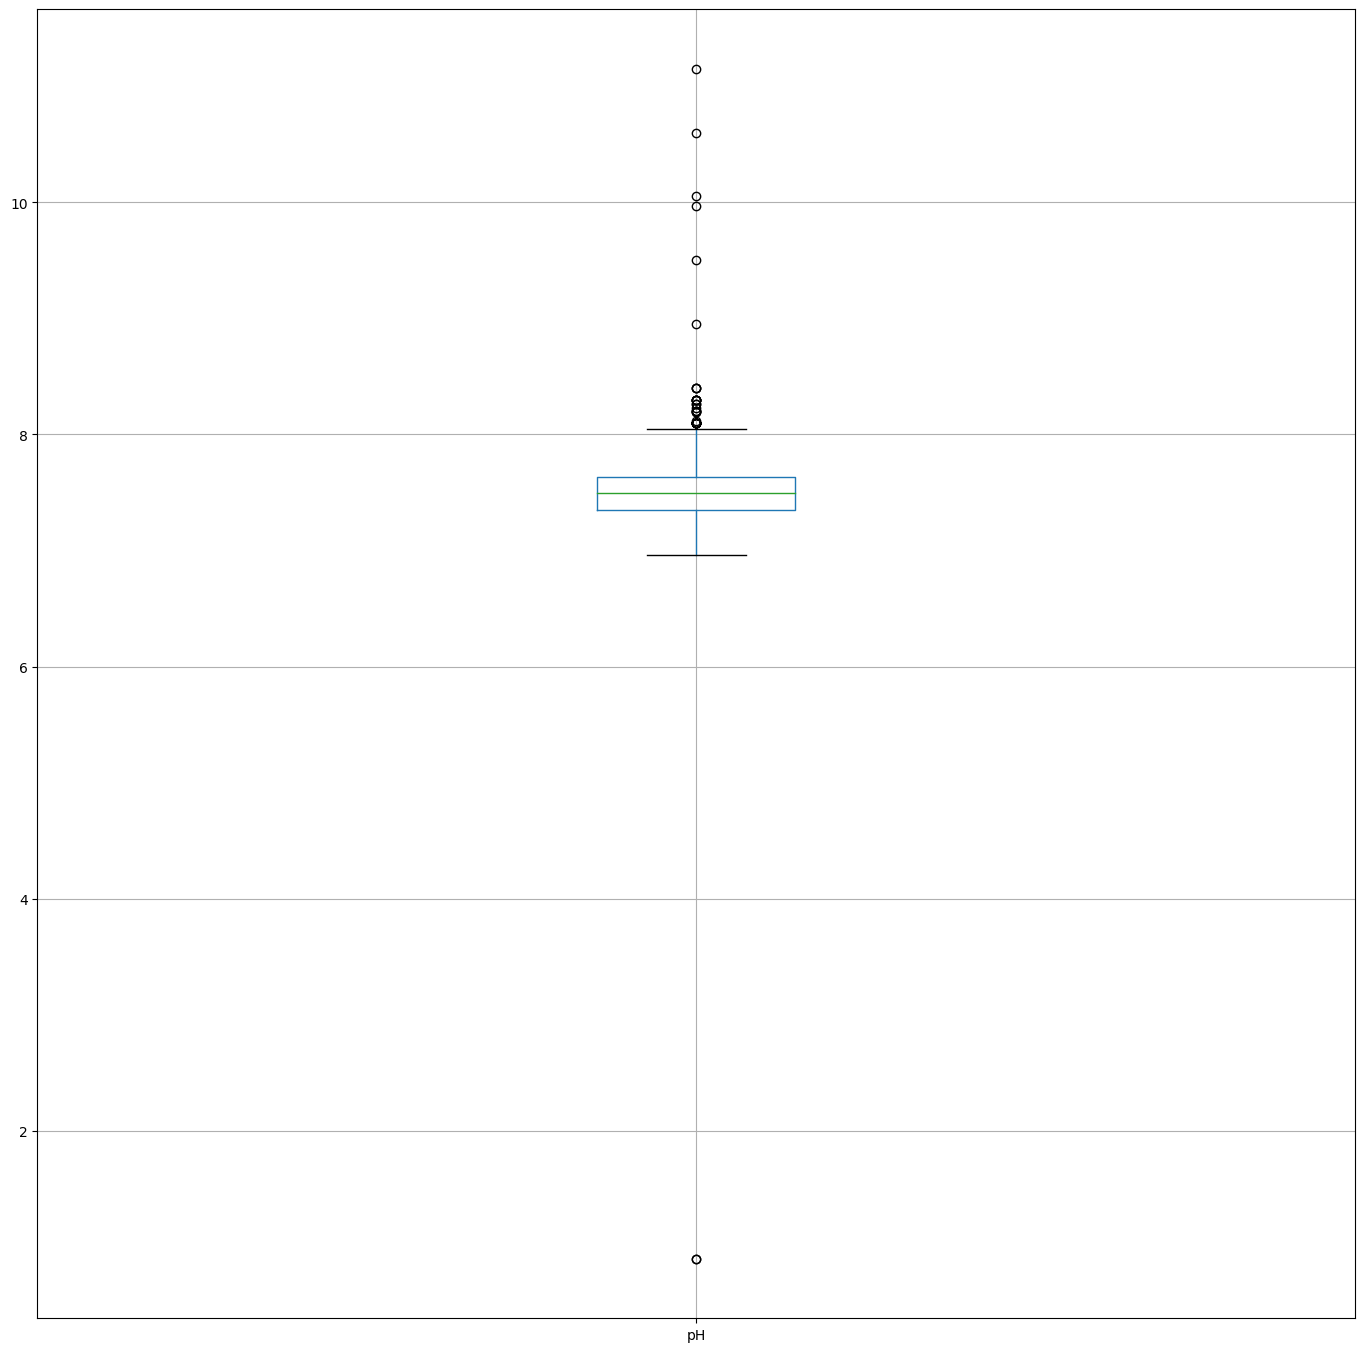

In [17]:
data[['pH']].boxplot(figsize=(17,17))

above cell : showing outliers in pH value

below cell : below cell are just done before knowing about the outlier,

i understand that there are outliers present in the data through the plotting of histograms

In [18]:
data.corr()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
N,1.000000,-0.010049,0.050616,0.075138,-0.005646,0.029887,-0.124959,0.054240,0.076108,-0.183832,0.105870,-0.170835,0.707383
P,-0.010049,1.000000,0.086964,0.004857,0.006082,-0.008996,-0.100204,-0.016912,0.141165,0.054689,0.045265,-0.097401,0.212780
K,0.050616,0.086964,1.000000,0.002661,-0.109726,-0.029005,0.026489,-0.002511,-0.053442,-0.005597,0.021157,0.108025,0.059666
pH,0.075138,0.004857,0.002661,1.000000,0.058217,-0.015926,0.013164,-0.008321,-0.032685,-0.000223,-0.008488,0.010115,0.082584
EC,-0.005646,0.006082,-0.109726,0.058217,1.000000,-0.007045,0.051810,-0.035703,-0.041525,0.035638,-0.043662,-0.004469,-0.025346
OC,0.029887,-0.008996,-0.029005,-0.015926,-0.007045,1.000000,0.046813,0.625683,0.282128,-0.009703,-0.078540,0.106760,0.035416
S,-0.124959,-0.100204,0.026489,0.013164,0.051810,0.046813,1.000000,-0.013870,-0.208752,0.158130,-0.226249,0.478017,-0.061733
Zn,0.054240,-0.016912,-0.002511,-0.008321,-0.035703,0.625683,-0.013870,1.000000,0.548485,-0.051229,-0.065154,0.056252,0.032089
Fe,0.076108,0.141165,-0.053442,-0.032685,-0.041525,0.282128,-0.208752,0.548485,1.000000,0.138121,0.275564,-0.332181,0.037625
Cu,-0.183832,0.054689,-0.005597,-0.000223,0.035638,-0.009703,0.158130,-0.051229,0.138121,1.000000,0.079934,0.101115,-0.136954


we will take the values which are positively corelated, the logic behind using correlation for feature selection is that good variables correlate highly with the target

What Minerals Make Soil Rich And Fertile?

Name	Functions

Nitrogen (N)	is required for the formation of chlorophyll;
contributes to the development of leaves and overall crop growth.

Phosphorus (P)	 promotes the development of roots, buds, flowers, and seeds;
helps plants to survive extremely cold winters and general environmental stress.

Potassium (K)	improves metabolism and moisture retention;
increases resistance to pathogens.

Magnesium (Mg)	a chlorophyll component required for the formation of the green color of leaves and photosynthesis.

Sulfur (S)	aids in disease resistance;
is found in enzymes, amino acids, proteins, and vitamins.

Calcium (Ca)	contributes to plant immunity by participating in the formation of cell walls;
facilitates nitrogen metabolism and assimilation.

In addition to the minerals listed, plants also need trace amounts of the following eight micronutrients: iron (Fe), copper (Cu), manganese (Mn), molybdenum (Mo), boron (B), zinc (Zn), nickel (Ni), chlorine (Cl).

In [19]:
data["Output"].value_counts()

1    440
0    401
2     39
Name: Output, dtype: int64

In [20]:
output = data[['Output']]
output

,Output
0,0
1,0
2,0
3,0
4,1
...,...
875,1
876,1
877,1
878,2


array([[<Axes: title={'center': 'Output'}>]], dtype=object)

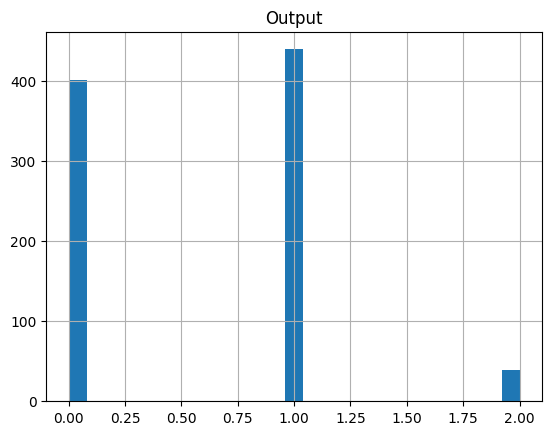

In [21]:
output.hist(bins = 25)

In [22]:
feature = data.drop('Output', axis = 1)
feature

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.40,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.30,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.00,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.80,0.25,0.76,1.69,2.43,2.26
...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53


array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'pH'}>, <Axes: title={'center': 'EC'}>,
        <Axes: title={'center': 'OC'}>],
       [<Axes: title={'center': 'S'}>, <Axes: title={'center': 'Zn'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Cu'}>, <Axes: title={'center': 'Mn'}>,
        <Axes: title={'center': 'B'}>]], dtype=object)

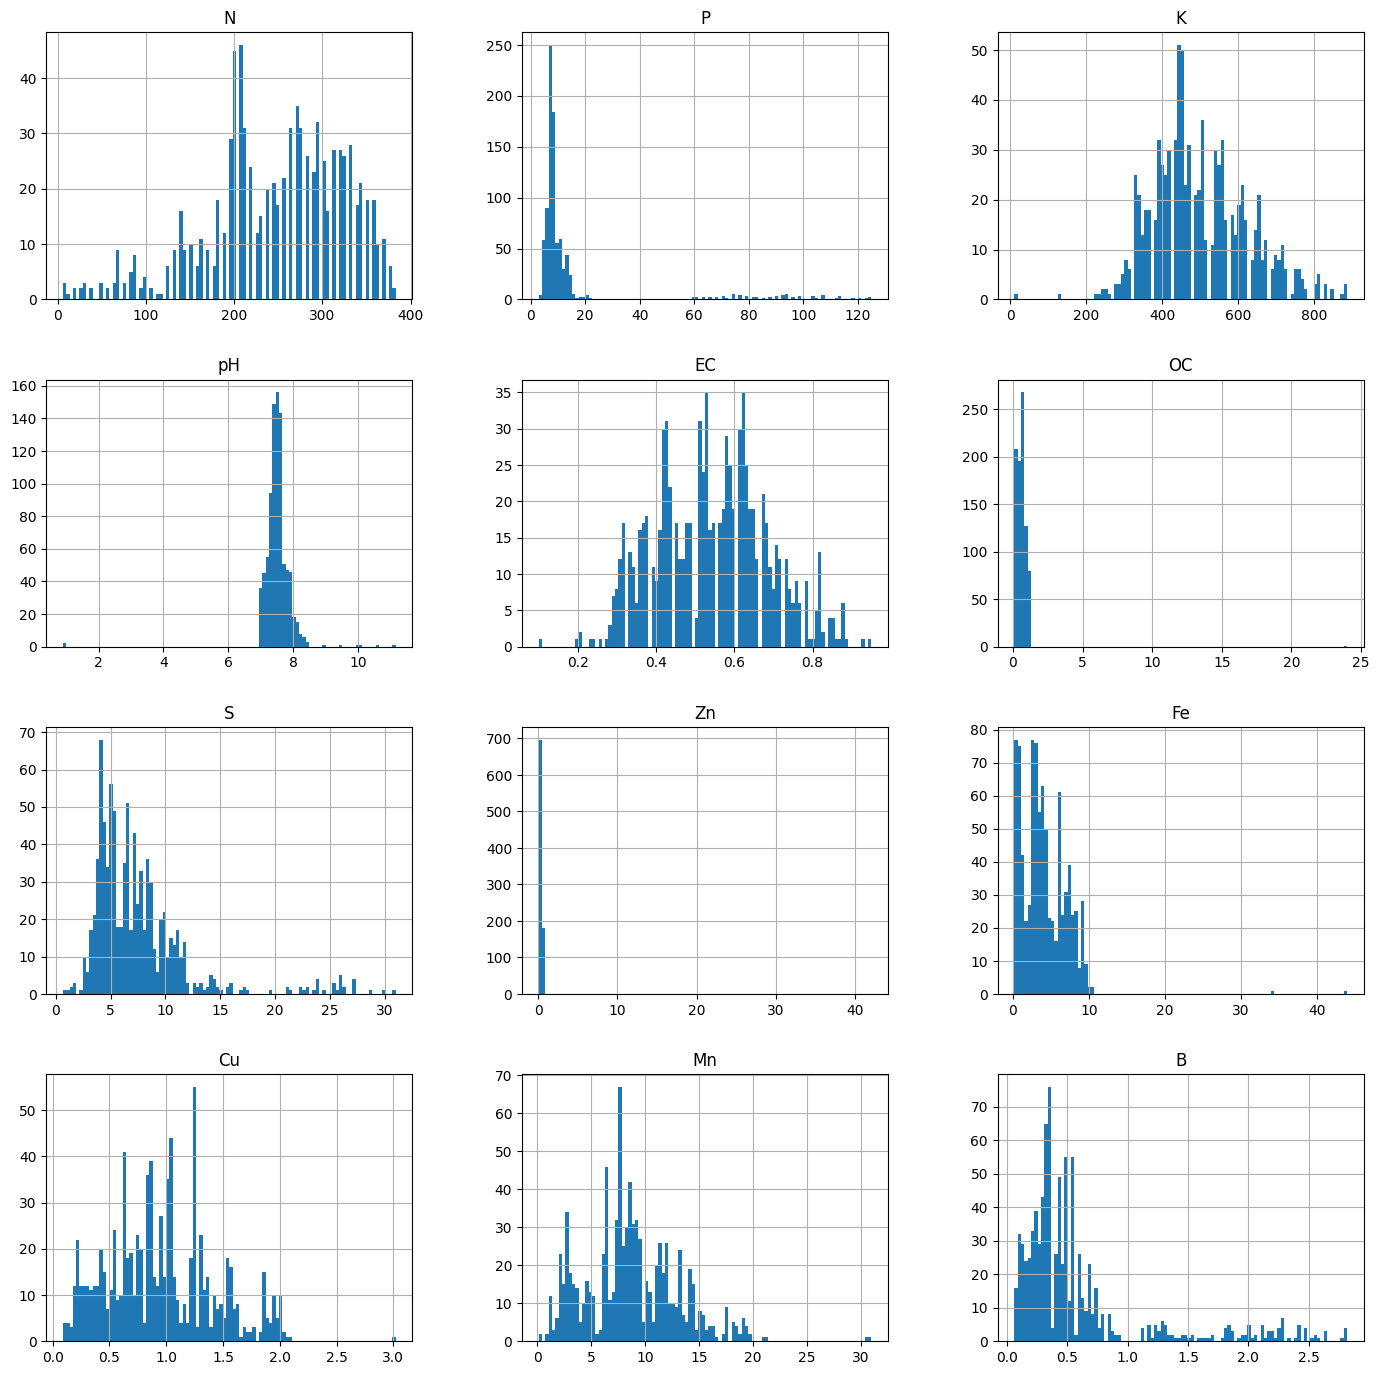

In [23]:
feature.hist(figsize=(17,17),bins=100)

we can see the histograms are right skewed and then also we go for scaling the feature but if we see closely we can see outliers and if we remove those outliers the se histogram will definitely becomes not skewed

Scaling the features

In [24]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 82.6 KB


We use Log Transform to convert skewed distibution to a normal distribution

In [25]:
import numpy as np

In [26]:
sFeature = feature.apply(lambda x: np.log10(x))

In [27]:
sFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    float64
 1   P       880 non-null    float64
 2   K       880 non-null    float64
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
dtypes: float64(12)
memory usage: 82.6 KB


array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'pH'}>, <Axes: title={'center': 'EC'}>,
        <Axes: title={'center': 'OC'}>],
       [<Axes: title={'center': 'S'}>, <Axes: title={'center': 'Zn'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Cu'}>, <Axes: title={'center': 'Mn'}>,
        <Axes: title={'center': 'B'}>]], dtype=object)

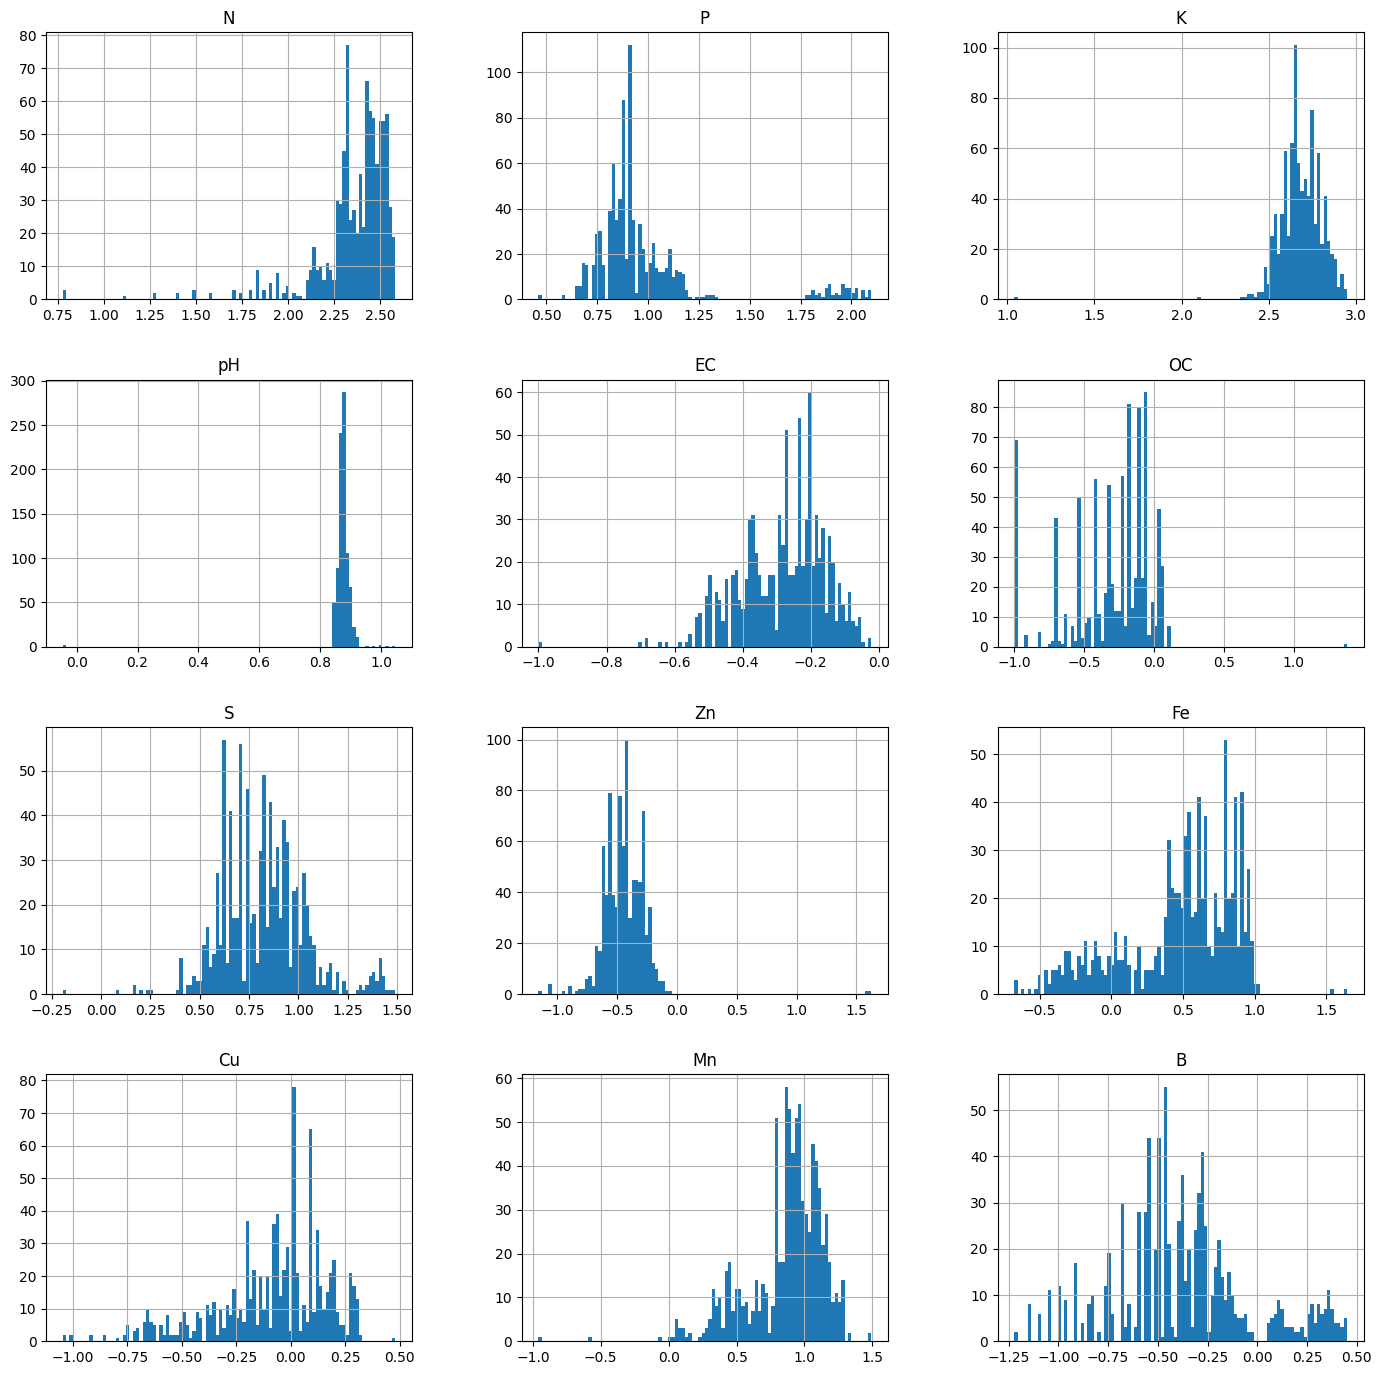

In [28]:
sFeature.hist(bins = 100, figsize= (17,17))

on analyzing the graphs, we see there is still skewness and that is an alert that there is problem, which is the outliers and so in the next step we remove the outliers

there are lots of outliers and we need to remove those outliers for a better normalized data

In [29]:


# Assuming 'data' is your DataFrame
# Loop through each column in the DataFrame
for column in data.columns:
    # Calculate the 25th and 75th percentiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 -  IQR
    upper_bound = Q3 +  IQR

    # Remove outliers by keeping only values within the bounds
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# The DataFrame 'data' now contains rows without outliers in any column


In [30]:
data.shape

(437, 13)

In [31]:
soil = data

soil.reset_index(inplace=True)

In [32]:
soil.drop(['index'],axis =1, inplace= True)

In [33]:
soil

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
1,245,8.1,560,7.31,0.63,0.78,11.60,0.29,0.43,0.57,7.73,0.74,0
2,245,8.3,560,7.58,0.74,0.83,8.20,0.32,0.96,1.57,2.67,0.59,0
3,107,8.3,612,7.43,0.43,0.75,7.20,0.18,0.95,0.89,2.16,0.74,0
4,201,5.3,507,7.60,0.53,0.39,10.86,0.32,9.32,0.69,9.03,0.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,339,8.3,380,7.67,0.32,0.88,5.13,0.33,7.96,1.65,12.47,0.44,1
433,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
434,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
435,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


soil is the data with outliers removed

In [34]:
soil.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,253.908467,8.164760,473.897025,7.498810,0.544783,0.554622,6.404897,0.362906,4.480435,0.919176,8.975240,0.356522,0.521739
std,63.595740,2.313858,102.506392,0.213046,0.136613,0.300752,2.339976,0.105618,2.321101,0.387115,2.884741,0.183205,0.552400
min,100.000000,3.900000,264.000000,7.050000,0.240000,0.100000,1.700000,0.130000,0.210000,0.090000,2.110000,0.060000,0.000000
25%,201.000000,6.800000,391.000000,7.350000,0.430000,0.290000,4.520000,0.270000,2.680000,0.640000,7.350000,0.210000,0.000000
50%,257.000000,7.700000,465.000000,7.500000,0.560000,0.510000,6.000000,0.350000,3.950000,0.870000,8.600000,0.340000,0.000000
75%,307.000000,9.000000,549.000000,7.620000,0.640000,0.780000,8.140000,0.420000,6.320000,1.230000,11.250000,0.480000,1.000000
max,377.000000,14.500000,718.000000,7.950000,0.850000,1.170000,12.700000,0.620000,9.670000,1.870000,15.960000,0.800000,2.000000


<Axes: >

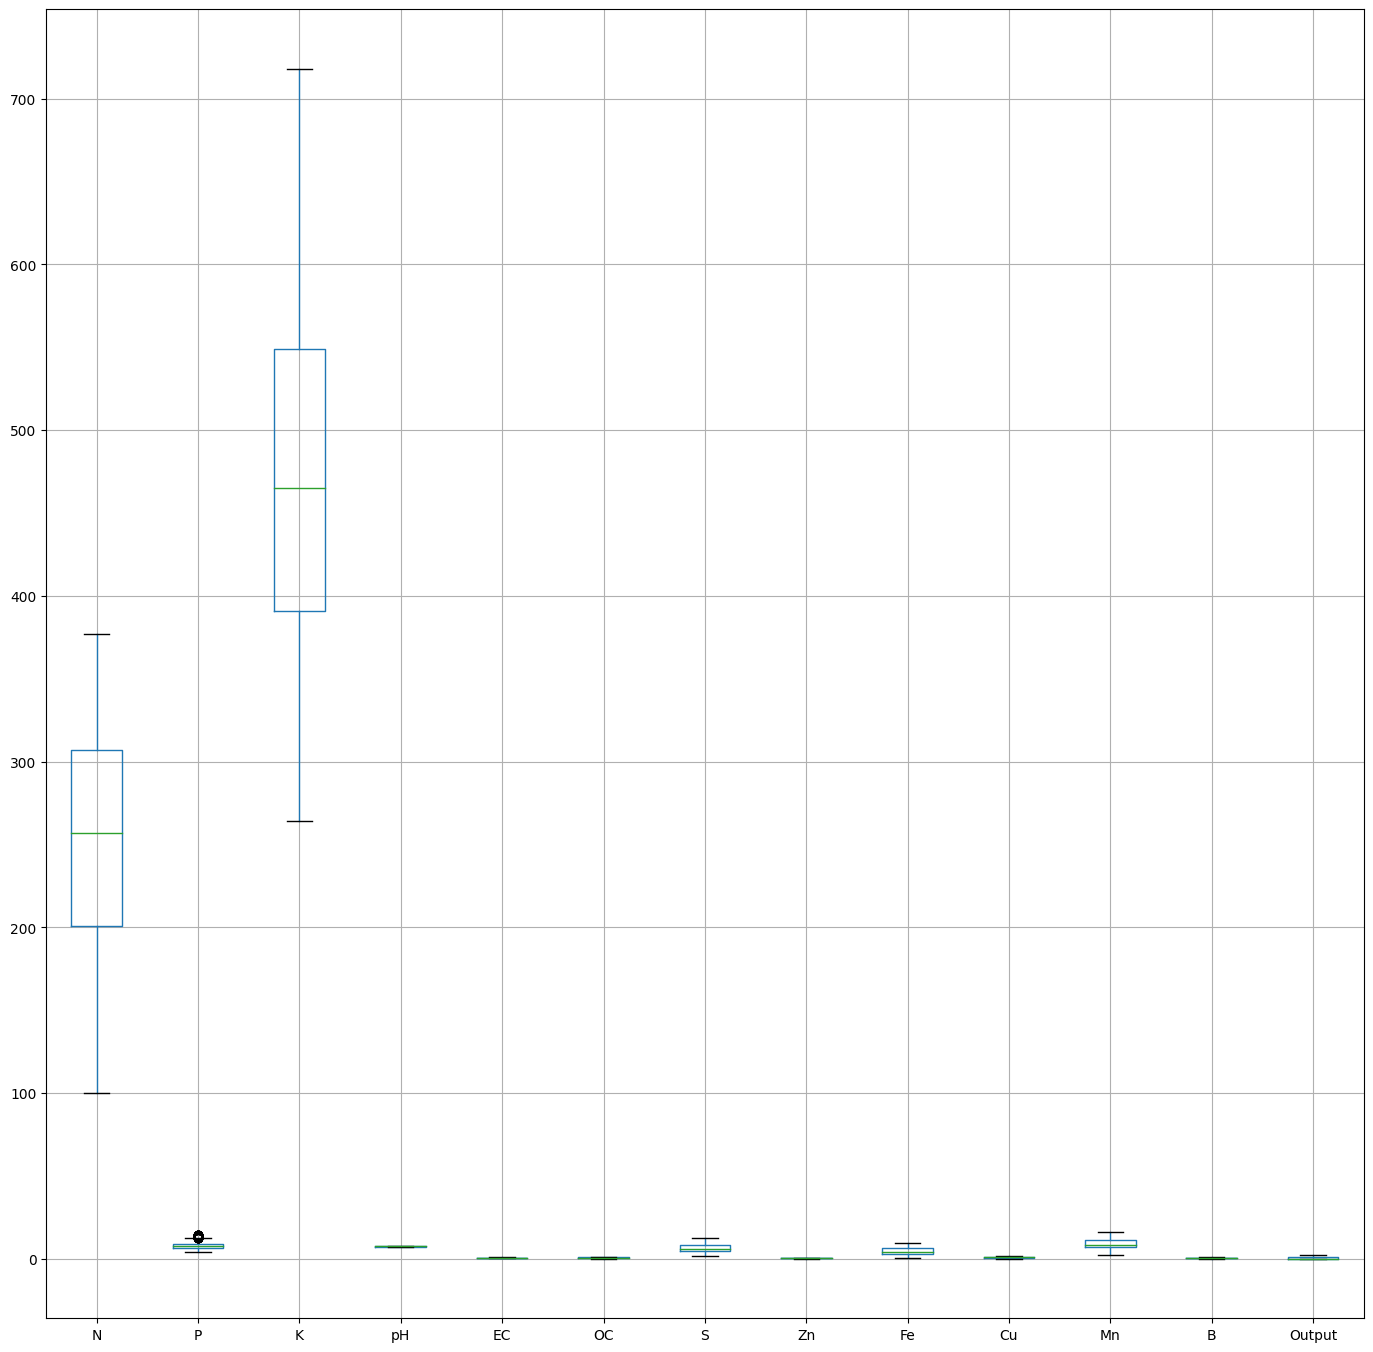

In [35]:
soil.boxplot(figsize=(17,17))

In [36]:
corr = soil.corr()
corr

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
N,1.000000,0.373325,0.078492,0.116264,0.003855,0.045957,0.000611,-0.049893,0.003627,-0.017018,-0.045062,0.160741,0.805904
P,0.373325,1.000000,0.083371,0.026993,-0.012562,0.026222,0.019691,-0.013526,-0.010765,0.021784,0.061664,0.116004,0.498192
K,0.078492,0.083371,1.000000,-0.073127,-0.072611,-0.038337,-0.011863,0.142869,-0.029318,0.063273,0.029536,0.196715,0.006743
pH,0.116264,0.026993,-0.073127,1.000000,0.197908,-0.002398,0.040848,-0.026277,-0.005978,0.037209,-0.044644,-0.039924,0.124949
EC,0.003855,-0.012562,-0.072611,0.197908,1.000000,-0.042998,0.052920,0.009271,-0.060034,0.055327,-0.054534,-0.033836,-0.007307
OC,0.045957,0.026222,-0.038337,-0.002398,-0.042998,1.000000,0.061538,0.060091,0.036977,0.086303,0.039292,0.082263,0.061518
S,0.000611,0.019691,-0.011863,0.040848,0.052920,0.061538,1.000000,0.137062,0.163859,0.144667,0.116008,0.154550,0.012249
Zn,-0.049893,-0.013526,0.142869,-0.026277,0.009271,0.060091,0.137062,1.000000,0.270433,0.265744,0.124423,0.340027,-0.055139
Fe,0.003627,-0.010765,-0.029318,-0.005978,-0.060034,0.036977,0.163859,0.270433,1.000000,0.259854,0.207416,0.202724,0.017049
Cu,-0.017018,0.021784,0.063273,0.037209,0.055327,0.086303,0.144667,0.265744,0.259854,1.000000,0.177721,0.150669,-0.020509


<Axes: >

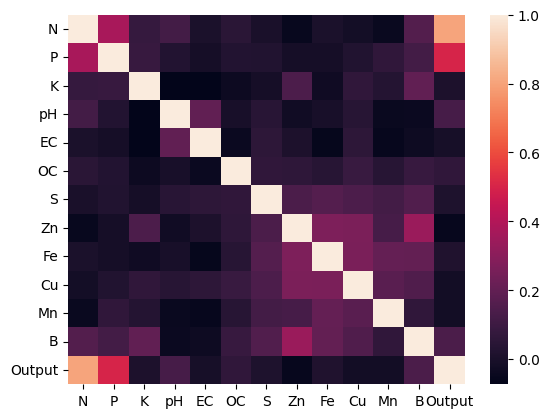

In [37]:
import seaborn as sns
sns.heatmap(corr)

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'EC'}>, <Axes: title={'center': 'OC'}>,
        <Axes: title={'center': 'S'}>, <Axes: title={'center': 'Zn'}>],
       [<Axes: title={'center': 'Fe'}>, <Axes: title={'center': 'Cu'}>,
        <Axes: title={'center': 'Mn'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'Output'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

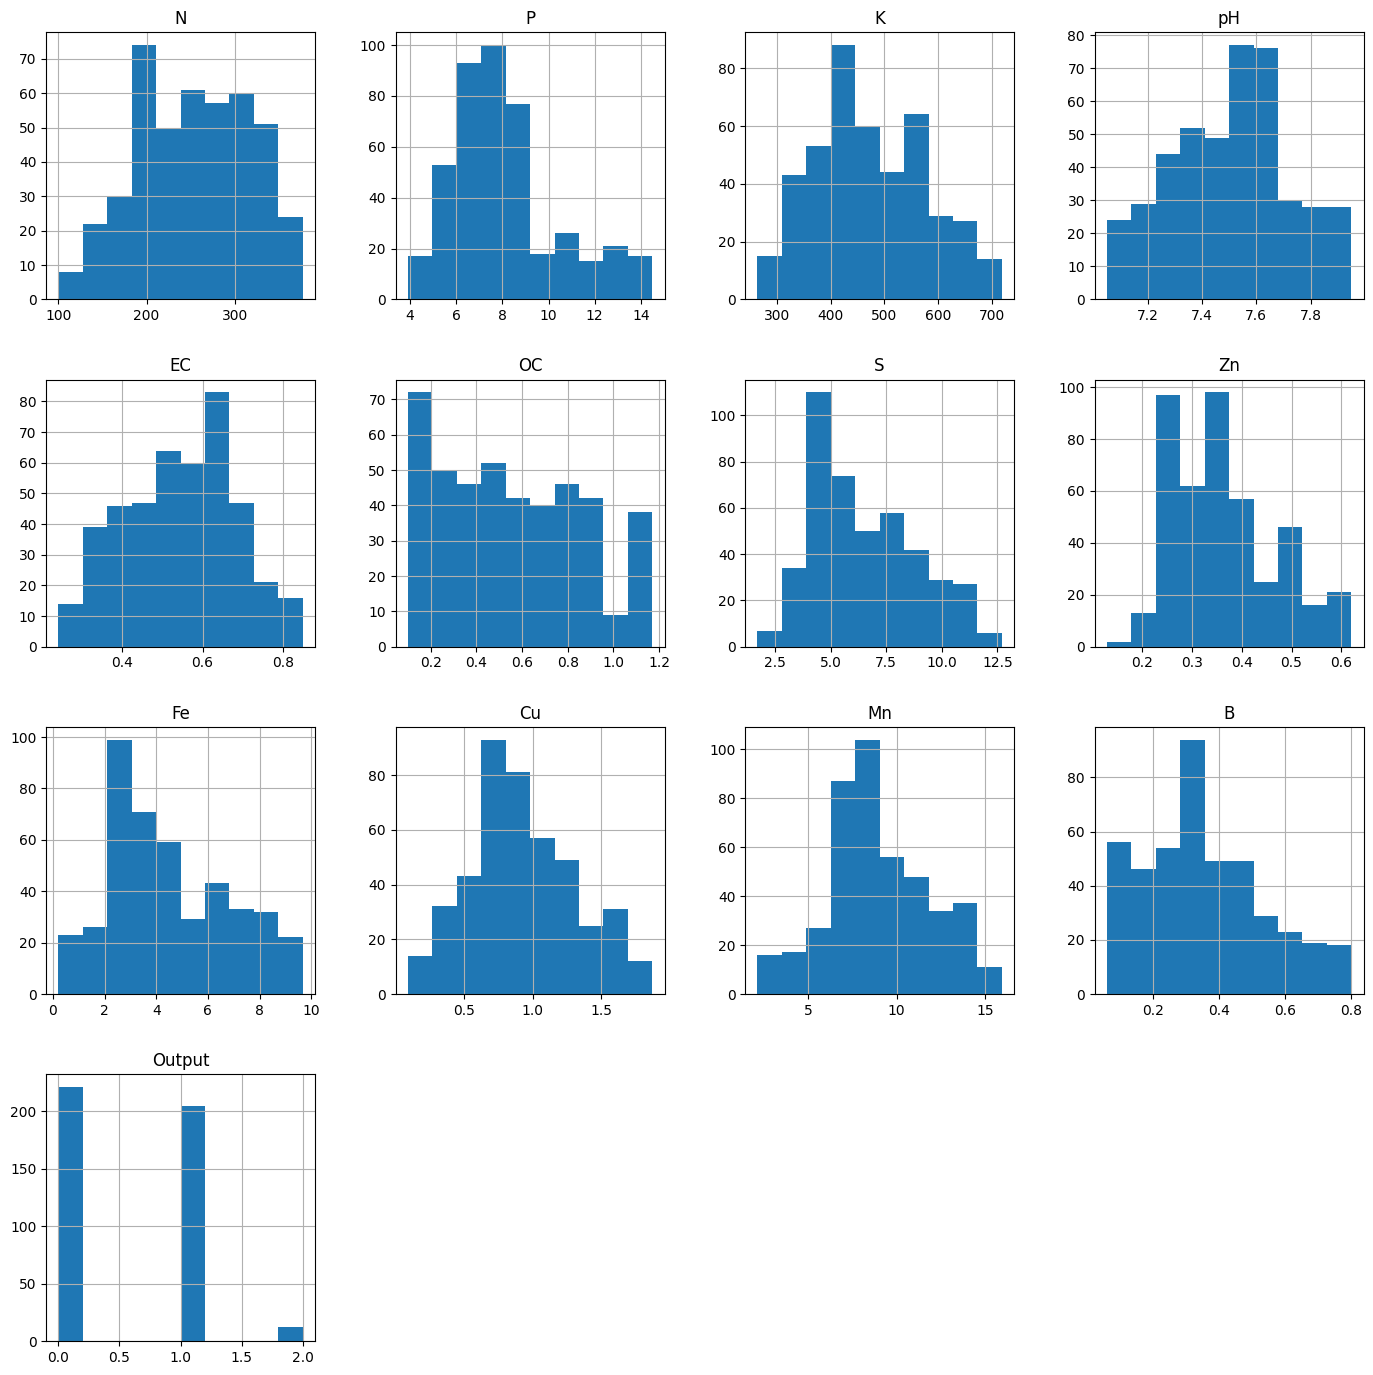

In [38]:
soil.hist(figsize=(17,17))

the data is not scaled so will scaled the features and the join the output with scaled data

In [39]:
Feature = soil.drop(['Output'], axis = 1)

In [40]:
Feature

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11
1,245,8.1,560,7.31,0.63,0.78,11.60,0.29,0.43,0.57,7.73,0.74
2,245,8.3,560,7.58,0.74,0.83,8.20,0.32,0.96,1.57,2.67,0.59
3,107,8.3,612,7.43,0.43,0.75,7.20,0.18,0.95,0.89,2.16,0.74
4,201,5.3,507,7.60,0.53,0.39,10.86,0.32,9.32,0.69,9.03,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...
432,339,8.3,380,7.67,0.32,0.88,5.13,0.33,7.96,1.65,12.47,0.44
433,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40
434,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32
435,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53


In [41]:
Fertility = soil[['Output']]
Fertility

,Output
0,0
1,0
2,0
3,0
4,0
...,...
432,1
433,1
434,1
435,2


as after log transformation some data are negative, we use a range between 0 and 1

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
scaledFeatures = scaler.fit_transform(Feature)

In [44]:
scaledFeatures

array([[0.13718412, 0.44339623, 0.65198238, ..., 0.38202247, 0.4765343 ,
        0.06756757],
       [0.5234657 , 0.39622642, 0.65198238, ..., 0.26966292, 0.40577617,
        0.91891892],
       [0.5234657 , 0.41509434, 0.65198238, ..., 0.83146067, 0.04043321,
        0.71621622],
       ...,
       [0.63537906, 0.5       , 0.23348018, ..., 0.30337079, 0.31552347,
        0.35135135],
       [0.79422383, 0.93396226, 0.27973568, ..., 0.52247191, 0.80433213,
        0.63513514],
       [0.59205776, 0.60377358, 0.46475771, ..., 1.        , 0.61516245,
        0.77027027]])

In [45]:
ScaledFeatureDF = pd.DataFrame(scaledFeatures, columns= Feature.columns)
ScaledFeatureDF

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,0.137184,0.443396,0.651982,0.455556,0.622951,0.560748,0.381818,0.224490,0.010571,0.382022,0.476534,0.067568
1,0.523466,0.396226,0.651982,0.288889,0.639344,0.635514,0.900000,0.326531,0.023256,0.269663,0.405776,0.918919
2,0.523466,0.415094,0.651982,0.588889,0.819672,0.682243,0.590909,0.387755,0.079281,0.831461,0.040433,0.716216
3,0.025271,0.415094,0.766520,0.422222,0.311475,0.607477,0.500000,0.102041,0.078224,0.449438,0.003610,0.918919
4,0.364621,0.132075,0.535242,0.611111,0.475410,0.271028,0.832727,0.387755,0.963002,0.337079,0.499639,0.851351
...,...,...,...,...,...,...,...,...,...,...,...,...
432,0.862816,0.415094,0.255507,0.688889,0.131148,0.728972,0.311818,0.408163,0.819239,0.876404,0.748014,0.513514
433,0.592058,0.481132,0.488987,0.211111,0.377049,0.000000,0.201818,0.448980,0.850951,0.202247,0.423827,0.459459
434,0.635379,0.500000,0.233480,0.633333,0.622951,0.364486,0.449091,0.591837,0.355180,0.303371,0.315523,0.351351
435,0.794224,0.933962,0.279736,0.366667,0.672131,0.906542,0.339091,0.918367,0.461945,0.522472,0.804332,0.635135


array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'pH'}>, <Axes: title={'center': 'EC'}>,
        <Axes: title={'center': 'OC'}>],
       [<Axes: title={'center': 'S'}>, <Axes: title={'center': 'Zn'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Cu'}>, <Axes: title={'center': 'Mn'}>,
        <Axes: title={'center': 'B'}>]], dtype=object)

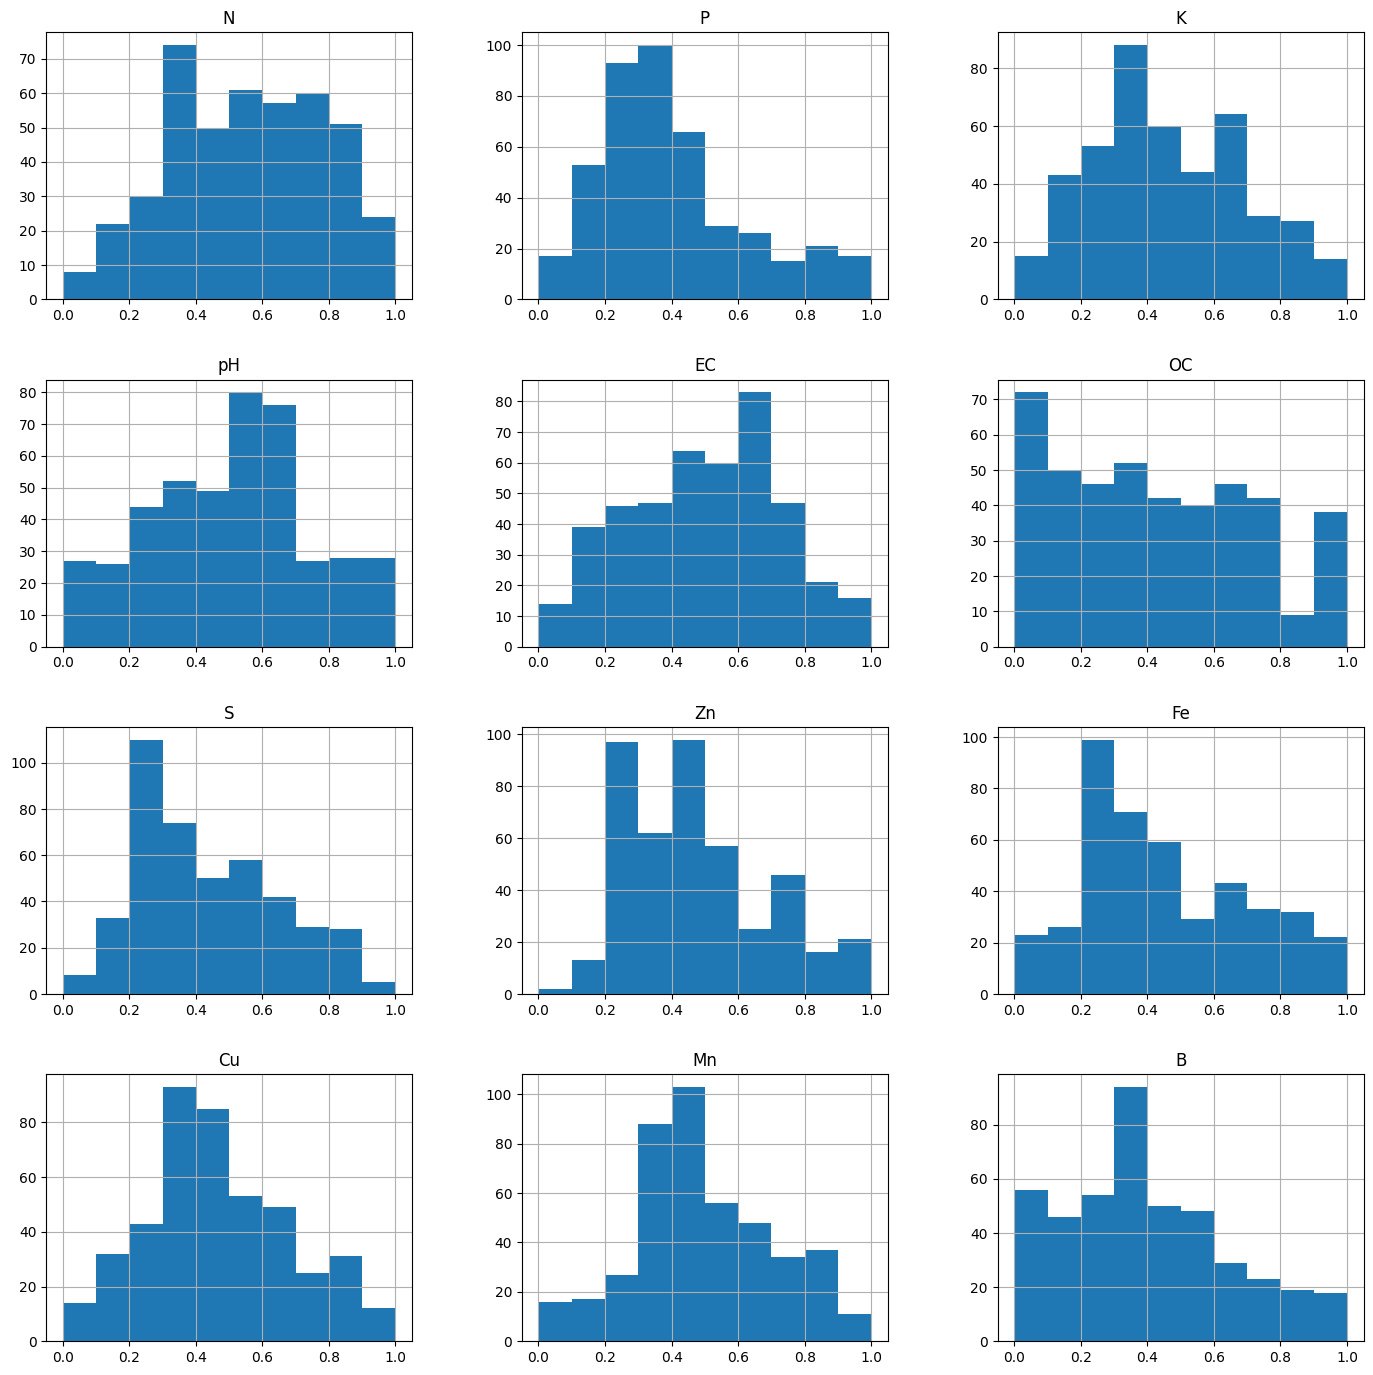

In [46]:
ScaledFeatureDF.hist(figsize=(17,17))

here value are in good scale

In [47]:
#now features are scaled
#we now perform train and test dataset split
# and before splitting we will joim the output clums with the scaled data
#no need to join (lesson from train test split)

In [48]:
#joining th output column
main_data = pd.concat([ScaledFeatureDF, Fertility], axis = 1)
main_data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,0.137184,0.443396,0.651982,0.455556,0.622951,0.560748,0.381818,0.224490,0.010571,0.382022,0.476534,0.067568,0
1,0.523466,0.396226,0.651982,0.288889,0.639344,0.635514,0.900000,0.326531,0.023256,0.269663,0.405776,0.918919,0
2,0.523466,0.415094,0.651982,0.588889,0.819672,0.682243,0.590909,0.387755,0.079281,0.831461,0.040433,0.716216,0
3,0.025271,0.415094,0.766520,0.422222,0.311475,0.607477,0.500000,0.102041,0.078224,0.449438,0.003610,0.918919,0
4,0.364621,0.132075,0.535242,0.611111,0.475410,0.271028,0.832727,0.387755,0.963002,0.337079,0.499639,0.851351,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0.862816,0.415094,0.255507,0.688889,0.131148,0.728972,0.311818,0.408163,0.819239,0.876404,0.748014,0.513514,1
433,0.592058,0.481132,0.488987,0.211111,0.377049,0.000000,0.201818,0.448980,0.850951,0.202247,0.423827,0.459459,1
434,0.635379,0.500000,0.233480,0.633333,0.622951,0.364486,0.449091,0.591837,0.355180,0.303371,0.315523,0.351351,1
435,0.794224,0.933962,0.279736,0.366667,0.672131,0.906542,0.339091,0.918367,0.461945,0.522472,0.804332,0.635135,2


# splitting 80 - 20 data

In [49]:
from sklearn.model_selection import train_test_split as tt

In [50]:
tt(ScaledFeatureDF, Fertility,test_size=0.2,random_state=42)

[            N         P         K        pH        EC        OC         S  \
 265  0.772563  0.339623  0.092511  0.655556  0.557377  0.093458  0.284545   
 405  0.433213  0.481132  0.418502  0.266667  0.983607  0.177570  0.256364   
 31   0.884477  0.273585  0.511013  0.722222  0.540984  0.728972  0.722727   
 84   0.703971  0.415094  0.744493  0.700000  0.442623  0.485981  0.127273   
 299  0.794224  0.830189  0.185022  0.277778  0.327869  0.177570  0.558182   
 ..        ...       ...       ...       ...       ...       ...       ...   
 106  1.000000  0.273585  0.138767  0.511111  1.000000  0.149533  0.209091   
 270  0.274368  0.726415  0.301762  0.855556  0.639344  0.177570  0.832727   
 348  0.635379  0.443396  0.488987  0.522222  0.459016  0.542056  0.284545   
 435  0.794224  0.933962  0.279736  0.366667  0.672131  0.906542  0.339091   
 102  0.841155  0.188679  0.279736  0.433333  0.688525  0.149533  0.300000   
 
            Zn        Fe        Cu        Mn         B  
 265 

In [51]:
xtrain, xtest, ytrain, ytest = tt(ScaledFeatureDF, Fertility,test_size=0.2,random_state=42)

In [52]:
xtrain, xtest, ytrain, ytest

(            N         P         K        pH        EC        OC         S  \
 265  0.772563  0.339623  0.092511  0.655556  0.557377  0.093458  0.284545   
 405  0.433213  0.481132  0.418502  0.266667  0.983607  0.177570  0.256364   
 31   0.884477  0.273585  0.511013  0.722222  0.540984  0.728972  0.722727   
 84   0.703971  0.415094  0.744493  0.700000  0.442623  0.485981  0.127273   
 299  0.794224  0.830189  0.185022  0.277778  0.327869  0.177570  0.558182   
 ..        ...       ...       ...       ...       ...       ...       ...   
 106  1.000000  0.273585  0.138767  0.511111  1.000000  0.149533  0.209091   
 270  0.274368  0.726415  0.301762  0.855556  0.639344  0.177570  0.832727   
 348  0.635379  0.443396  0.488987  0.522222  0.459016  0.542056  0.284545   
 435  0.794224  0.933962  0.279736  0.366667  0.672131  0.906542  0.339091   
 102  0.841155  0.188679  0.279736  0.433333  0.688525  0.149533  0.300000   
 
            Zn        Fe        Cu        Mn         B  
 265 

# training decision tree classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc = DecisionTreeClassifier()

In [55]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [56]:
ypred = dtc.predict(xtest)

In [57]:
ypred

array([2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [58]:
from sklearn import metrics

In [59]:
metrics.accuracy_score(ytest,ypred)*100

89.77272727272727

<BarContainer object of 12 artists>

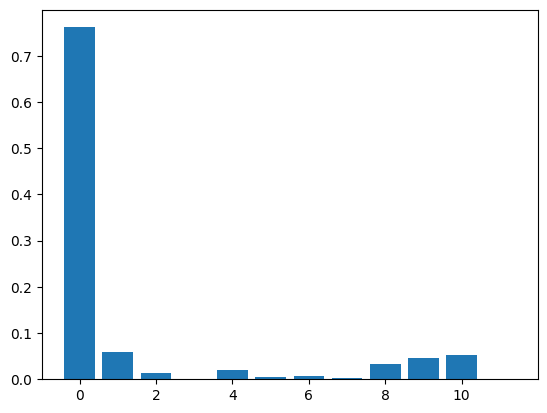

In [61]:
import matplotlib.pyplot as plt

plt.bar(range(xtrain.shape[1]),dtc.feature_importances_)

so we are achieving 86 percent accuracy

next we will use other classifier

next we will remove some feature and train another model to check its accuracy

next we will use other models wirh less features

# optimizing decision tree

In [62]:
dtc1 = DecisionTreeClassifier(criterion="entropy", max_depth=7)

In [63]:
dtc1.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [64]:
ypred1 = dtc1.predict(xtest)

In [65]:
metrics.accuracy_score(ytest,ypred1)*100

94.31818181818183

In [66]:
ypred1

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

so now after optimizing the decision tree we are achieving 95% accuracy

<BarContainer object of 12 artists>

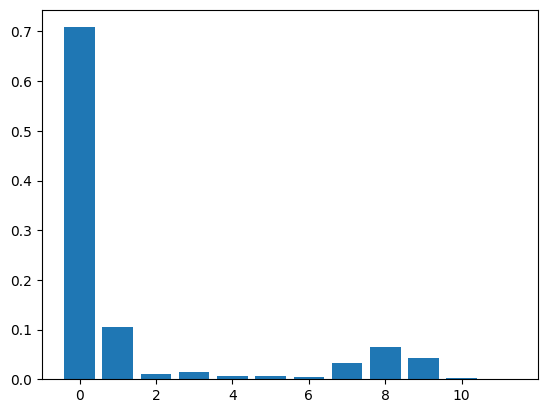

In [67]:
plt.bar(range(xtrain.shape[1]),dtc1.feature_importances_)

In [68]:
range(xtrain.shape[1])

range(0, 12)

# saving this 95 percent accuracy model

In [69]:
import pickle as pk

In [70]:
saved_model = pk.dumps(dtc1)

In [71]:
dtc2 = pk.loads(saved_model)

In [75]:
with open('soil_fretility_analysis_model.pickle','wb') as f:
    pk.dump(dtc1,f)

In [ ]:
#/content/soil_fretility_analysis_model.pickle

In [ ]:
ypred2 = dtc2.predict(xtest)

In [ ]:
metrics.accuracy_score(ytest, ypred2)

# Training a Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel='poly',degree=3, C=1)
model1 = svm.SVC(kernel='rbf',gamma = 0.5, C=0.1)

In [ ]:
model.fit(xtrain, ytrain)
model1.fit(xtrain, ytrain)

In [ ]:
ypred3 = model.predict(xtest)

In [ ]:
ypred4 = model1.predict(xtest)

In [ ]:
metrics.accuracy_score(ytest,ypred3)*100

In [ ]:
metrics.accuracy_score(ytest,ypred4)*100

# training a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
LR = RandomForestClassifier()

In [ ]:
LR.fit(xtrain, ytrain)

In [ ]:
ypred5 = LR.predict(xtest)

In [ ]:
metrics.accuracy_score(ytest, ypred5)*100

# some testing with data containing outliers

In [ ]:
feature, output

In [ ]:
xtrain1, xtest1 , ytrain1, ytest = tt(feature , output, test_size=0.2, random_state= 40)

In [ ]:
des = DecisionTreeClassifier(criterion="entropy", max_depth=8)

In [ ]:
des.fit(xtrain1,ytrain1)

In [ ]:
ypred6 = des.predict(xtest1)

In [ ]:
metrics.accuracy_score(ytest,ypred6)

# dropping some not useful columns

In [ ]:
output

In [ ]:
reducedFeature = feature[['N','P','pH','B']]

In [ ]:
xtrain1, xtest1 , ytrain1, ytest1 = tt(reducedFeature , output, test_size=0.2, random_state= 30)

In [ ]:
des = DecisionTreeClassifier(criterion="entropy", max_depth=7)

In [ ]:
des.fit(xtrain1,ytrain1)

In [ ]:
ypred6 = des.predict(xtest1)

In [ ]:
metrics.accuracy_score(ytest1,ypred6)

In [ ]:
plt.bar(range(xtrain1.shape[1]),des.feature_importances_)

# now with no outlier data

In [ ]:
ScaledFeatureDF

In [ ]:
Fertility

In [ ]:
reducedFeature = ScaledFeatureDF[['N','P','Fe','Cu']]

In [ ]:
xtrain1, xtest1 , ytrain1, ytest1 = tt(reducedFeature , Fertility , test_size=0.3, random_state= 30)
des11 = DecisionTreeClassifier(criterion="entropy", max_depth=5, max_features=4)
des11.fit(xtrain1,ytrain1)
ypred6 = des11.predict(xtest1)
metrics.accuracy_score(ytest1,ypred6)

In [ ]:
plt.bar(range(xtrain1.shape[1]),des11.feature_importances_)

In [ ]:
ypred6